In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#import nltk
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("/Users/ikubannipaul/Documents/codes/data_science/ml/evaxion/python_analysis/new_ehl_data.csv")
df.head()

,Patient_ID,Patient_Name,Date_of_Birth,Gender,Legal_Requirements,Privacy_Regulations,Data_Ownership,Security_Risks,Access_Control,Punishments_for_Violations,Proprietary_Tools,User_Access_Procedures,User_Is_Authenticated,Last_Visit
0,344,Kimberly Lutz,1951-04-14,Male,Local Data Protection Laws,Data Encryption Standards,Healthcare Organization,Data Corruption,Attribute-Based Access Control,Legal Action,Encryption Software,Two-Factor Authentication,Not Authenticated,2024-07-08
1,540,Sharon Tyler,1964-10-01,Male,International Standards,Anonymization,Shared,Data Corruption,Attribute-Based Access Control,Legal Action,Secure Messaging Platforms,Secure Login,Not Authenticated,2023-05-14
2,398,Olivia Clay,1987-04-04,Female,GDPR Compliance,Confidentiality Agreements,Patient,Data Corruption,Role-Based Access Control,Reputational Damage,Proprietary EHR Systems,Secure Login,Authentication,2022-12-08
3,1976,Marvin Wood,1951-01-20,Female,International Standards,Confidentiality Agreements,Patient,Data Breach,Role-Based Access Control,Fines,Proprietary EHR Systems,Access Logs,Authentication,2023-07-11
4,1204,Sara Moreno,1957-10-08,Male,HIPAA Compliance,Data Encryption Standards,Shared,Data Breach,Role-Based Access Control,Fines,Proprietary EHR Systems,Access Logs,Authentication,2023-03-20


In [7]:
df['Legal_Requirements'].value_counts()

Legal_Requirements
Local Data Protection Laws    768
International Standards       744
HIPAA Compliance              737
GDPR Compliance               724
Name: count, dtype: int64

### Understanding the Dataset & Data Cleaning

In [8]:
df.head()

,Patient_ID,Patient_Name,Date_of_Birth,Gender,Legal_Requirements,Privacy_Regulations,Data_Ownership,Security_Risks,Access_Control,Punishments_for_Violations,Proprietary_Tools,User_Access_Procedures,User_Is_Authenticated,Last_Visit
0,344,Kimberly Lutz,1951-04-14,Male,Local Data Protection Laws,Data Encryption Standards,Healthcare Organization,Data Corruption,Attribute-Based Access Control,Legal Action,Encryption Software,Two-Factor Authentication,Not Authenticated,2024-07-08
1,540,Sharon Tyler,1964-10-01,Male,International Standards,Anonymization,Shared,Data Corruption,Attribute-Based Access Control,Legal Action,Secure Messaging Platforms,Secure Login,Not Authenticated,2023-05-14
2,398,Olivia Clay,1987-04-04,Female,GDPR Compliance,Confidentiality Agreements,Patient,Data Corruption,Role-Based Access Control,Reputational Damage,Proprietary EHR Systems,Secure Login,Authentication,2022-12-08
3,1976,Marvin Wood,1951-01-20,Female,International Standards,Confidentiality Agreements,Patient,Data Breach,Role-Based Access Control,Fines,Proprietary EHR Systems,Access Logs,Authentication,2023-07-11
4,1204,Sara Moreno,1957-10-08,Male,HIPAA Compliance,Data Encryption Standards,Shared,Data Breach,Role-Based Access Control,Fines,Proprietary EHR Systems,Access Logs,Authentication,2023-03-20


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Patient_ID                  2973 non-null   int64 
 1   Patient_Name                2973 non-null   object
 2   Date_of_Birth               2973 non-null   object
 3   Gender                      2973 non-null   object
 4   Legal_Requirements          2973 non-null   object
 5   Privacy_Regulations         2973 non-null   object
 6   Data_Ownership              2973 non-null   object
 7   Security_Risks              2973 non-null   object
 8   Access_Control              2973 non-null   object
 9   Punishments_for_Violations  2973 non-null   object
 10  Proprietary_Tools           2973 non-null   object
 11  User_Access_Procedures      2973 non-null   object
 12  User_Is_Authenticated       2973 non-null   object
 13  Last_Visit                  2973 non-null   obje

In [10]:
print(f"The shape of the data is {df.shape}")

The shape of the data is (2973, 14)


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'], format='%Y-%m-%d')
df['Age'] = (pd.Timestamp.now().normalize() - df['Date_of_Birth']).dt.days // 365

df['Legal_Requirements'] = df['Legal_Requirements'].astype('category')
df['Privacy_Regulations'] = df['Privacy_Regulations'].astype('category')
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df.drop(columns=["Patient_Name"], inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Patient_ID                  2973 non-null   int64         
 1   Date_of_Birth               2973 non-null   datetime64[ns]
 2   Gender                      2973 non-null   int64         
 3   Legal_Requirements          2973 non-null   category      
 4   Privacy_Regulations         2973 non-null   category      
 5   Data_Ownership              2973 non-null   object        
 6   Security_Risks              2973 non-null   object        
 7   Access_Control              2973 non-null   object        
 8   Punishments_for_Violations  2973 non-null   object        
 9   Proprietary_Tools           2973 non-null   object        
 10  User_Access_Procedures      2973 non-null   object        
 11  User_Is_Authenticated       2973 non-null   object      

In [14]:


categorical_columns = [
    'Legal_Requirements', 'Privacy_Regulations', 'Data_Ownership', 
    'Security_Risks', 'Access_Control', 'Punishments_for_Violations', 
    'Proprietary_Tools', 'User_Access_Procedures'
]

#check the unique values in each columns
for i in df[categorical_columns]:
  print(i + '    ',df[categorical_columns][i].unique())

# Define the columns that don't need one-hot encoding
non_categorical_columns = [col for col in df.columns if col not in categorical_columns]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

encoded_columns = categorical_columns
all_columns = encoded_columns + non_categorical_columns

df_encoded = df[all_columns]

print("Label Encoded Data:")
print(df_encoded.head())


Legal_Requirements     ['Local Data Protection Laws', 'International Standards', 'GDPR Compliance', 'HIPAA Compliance']
Categories (4, object): ['GDPR Compliance', 'HIPAA Compliance', 'International Standards', 'Local Data Protection Laws']
Privacy_Regulations     ['Data Encryption Standards', 'Anonymization', 'Confidentiality Agreements', 'Access Restrictions']
Categories (4, object): ['Access Restrictions', 'Anonymization', 'Confidentiality Agreements', 'Data Encryption Standards']
Data_Ownership     ['Healthcare Organization' 'Shared' 'Patient' 'Healthcare Provider']
Security_Risks     ['Data Corruption' 'Data Breach' 'Phishing Attacks' 'Unauthorized Access']
Access_Control     ['Attribute-Based Access Control' 'Role-Based Access Control'
 'Discretionary Access Control']
Punishments_for_Violations     ['Legal Action' 'Reputational Damage' 'Fines' 'Revocation of Access']
Proprietary_Tools     ['Encryption Software' 'Secure Messaging Platforms'
 'Proprietary EHR Systems' 'Compliance M

In [16]:
df_encoded['Last_Visit'] = pd.to_datetime(df_encoded['Last_Visit'], format='%Y-%m-%d')

In [17]:
print("\nData Types After Conversion:")
print(df_encoded.dtypes)


Data Types After Conversion:
Legal_Requirements                     int64
Privacy_Regulations                    int64
Data_Ownership                         int64
Security_Risks                         int64
Access_Control                         int64
Punishments_for_Violations             int64
Proprietary_Tools                      int64
User_Access_Procedures                 int64
Patient_ID                             int64
Date_of_Birth                 datetime64[ns]
Gender                                 int64
User_Is_Authenticated                 object
Last_Visit                    datetime64[ns]
Age                                    int64
dtype: object


In [18]:
print("\nData Summary After Preprocessing:")
print(df_encoded.describe())


Data Summary After Preprocessing:
       Legal_Requirements  Privacy_Regulations  Data_Ownership  \
count         2973.000000          2973.000000     2973.000000   
mean             1.523377             1.497141        1.495459   
min              0.000000             0.000000        0.000000   
25%              1.000000             1.000000        0.000000   
50%              2.000000             1.000000        1.000000   
75%              3.000000             2.000000        3.000000   
max              3.000000             3.000000        3.000000   
std              1.119632             1.118068        1.126159   

       Security_Risks  Access_Control  Punishments_for_Violations  \
count     2973.000000     2973.000000                 2973.000000   
mean         1.531450        0.999664                    1.539522   
min          0.000000        0.000000                    0.000000   
25%          1.000000        0.000000                    1.000000   
50%          2.000000    

In [19]:
df_encoded.head()

,Legal_Requirements,Privacy_Regulations,Data_Ownership,Security_Risks,Access_Control,Punishments_for_Violations,Proprietary_Tools,User_Access_Procedures,Patient_ID,Date_of_Birth,Gender,User_Is_Authenticated,Last_Visit,Age
0,3,3,0,1,0,1,1,2,344,1951-04-14,0,Not Authenticated,2024-07-08,73
1,2,1,3,1,0,1,3,1,540,1964-10-01,0,Not Authenticated,2023-05-14,59
2,0,2,2,1,2,2,2,1,398,1987-04-04,1,Authentication,2022-12-08,37
3,2,2,2,0,2,0,2,0,1976,1951-01-20,1,Authentication,2023-07-11,73
4,1,3,3,0,2,0,2,0,1204,1957-10-08,0,Authentication,2023-03-20,66


In [20]:
df_encoded.to_csv('ehl_data_label_encoded.csv', index=False)

## Train the model

In [21]:
df_encoded = pd.read_csv('ehl_data_label_encoded.csv')
# Convert Date_of_Birth and Last_Visit to numeric features
df_encoded['Last_Visit'] = pd.to_datetime(df_encoded['Last_Visit'])

# Convert dates to the number of days since the earliest date in the dataset
reference_date = pd.to_datetime('1900-01-01')
df_encoded['Days_Since_Last_Visit'] = (df_encoded['Last_Visit'] - reference_date).dt.days

# Drop the original date columns
df_encoded = df_encoded.drop(columns=['Date_of_Birth', 'Last_Visit'])
X = df_encoded.drop(columns=['User_Is_Authenticated'])
y = df_encoded['User_Is_Authenticated'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")


Training set features shape: (2378, 12)
Testing set features shape: (595, 12)
Training set target shape: (2378,)
Testing set target shape: (595,)


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2378 entries, 2394 to 860
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Legal_Requirements          2378 non-null   int64
 1   Privacy_Regulations         2378 non-null   int64
 2   Data_Ownership              2378 non-null   int64
 3   Security_Risks              2378 non-null   int64
 4   Access_Control              2378 non-null   int64
 5   Punishments_for_Violations  2378 non-null   int64
 6   Proprietary_Tools           2378 non-null   int64
 7   User_Access_Procedures      2378 non-null   int64
 8   Patient_ID                  2378 non-null   int64
 9   Gender                      2378 non-null   int64
 10  Age                         2378 non-null   int64
 11  Days_Since_Last_Visit       2378 non-null   int64
dtypes: int64(12)
memory usage: 241.5 KB


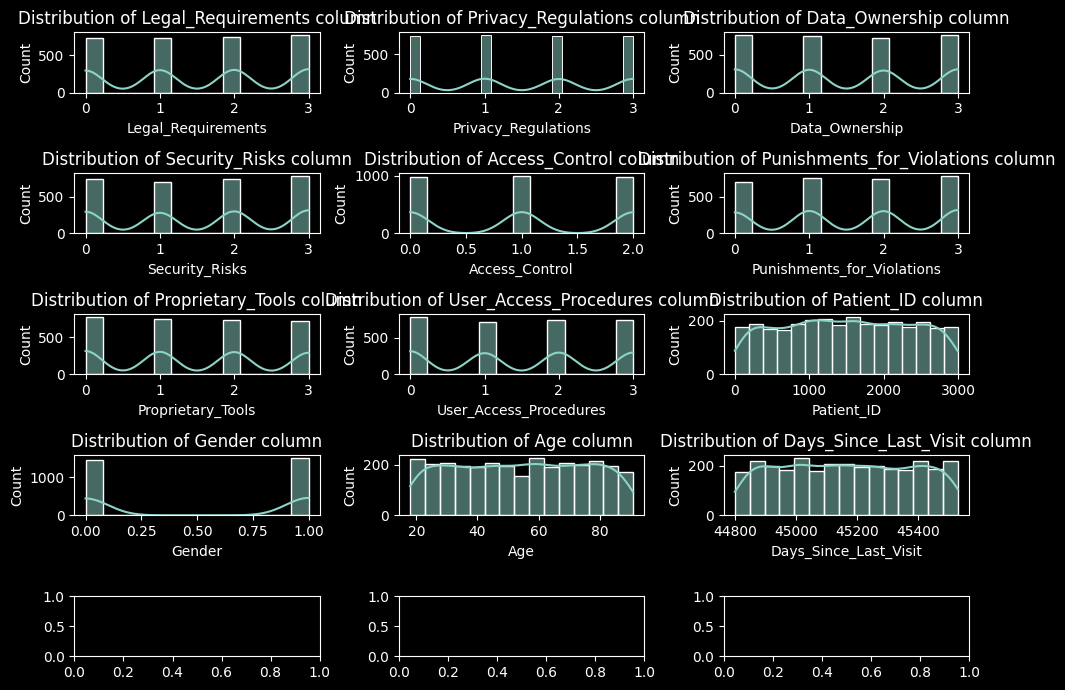

In [23]:
import seaborn as sns
num_col = [col for col in df_encoded.columns if df_encoded[col].dtype != 'object']

#plot the distribution plots for the integers to get information of their distributions
fig, axes = plt.subplots(5, 3, figsize=(10,7))
axes = axes.flatten()

for i, var in enumerate(num_col):
    sns.histplot(df_encoded[var], kde = True, ax=axes[i])
    axes[i].set_title(f"Distribution of {var} column")
plt.tight_layout()
plt.show();

ISOLATION FOREST

In [24]:
iso_forest = IsolationForest(n_estimators=2936, contamination=0.05, random_state=42)

# # Fit the model on the training data
iso_forest.fit(X_train)

# # Predict anomalies on the test data
y_test_pred = iso_forest.predict(X_test)

# # The prediction output is -1 for anomalies and 1 for normal points
# # Convert predictions to a DataFrame for easier analysis
anomalies_df = pd.DataFrame({'Index': X_test.index, 'Anomaly_Score': y_test_pred})

print(anomalies_df.head())


   Index  Anomaly_Score
0   2401              1
1   2863              1
2   2157              1
3    507              1
4   1817              1


In [37]:
y_test

2401       Authentication
2863    Not Authenticated
2157       Authentication
507     Not Authenticated
1817    Not Authenticated
              ...        
764        Authentication
1472       Authentication
2614       Authentication
678     Not Authenticated
605     Not Authenticated
Name: User_Is_Authenticated, Length: 595, dtype: object

In [28]:
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = 0  
    for true_label, predicted in zip(Y_true, Y_pred):  
        if true_label == predicted:  
            correctly_predicted += 1  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score  

In [40]:
#MODEL EVALUATION
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
y_test_pred_an = [1 if x == -1 else 0 for x in y_test_pred]
y_test_pred_binary = np.where(y_test_pred == 1, 1, 0)
y_test_binary = [1 if x == "Authentication" else 0 for x in y_test]
accuracy = accuracy_score(y_test_binary, y_test_pred_binary)
accuracy

0.4957983193277311

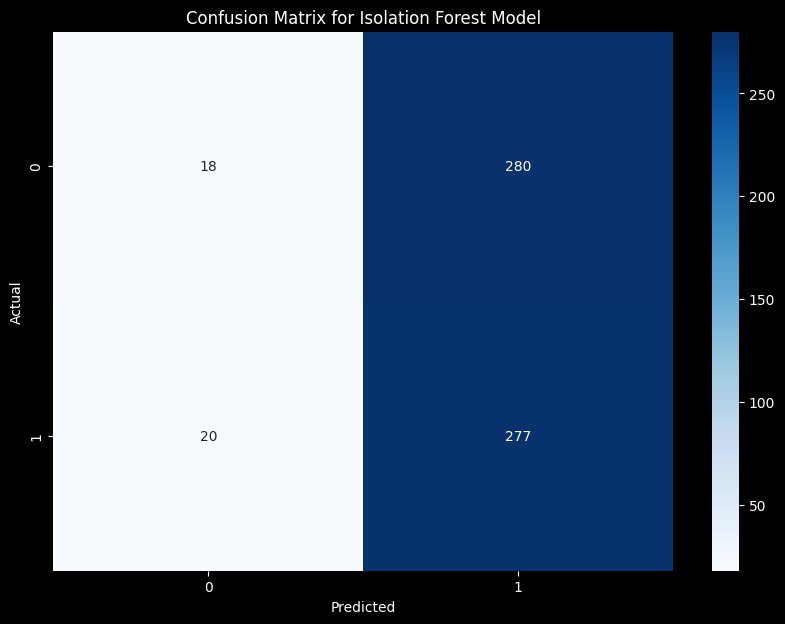

In [43]:
conf_matrix = confusion_matrix(y_test_binary, y_test_pred_binary)
conf_matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Isolation Forest Model')
plt.show()

In [45]:
df_encoded.head()

,Legal_Requirements,Privacy_Regulations,Data_Ownership,Security_Risks,Access_Control,Punishments_for_Violations,Proprietary_Tools,User_Access_Procedures,Patient_ID,Gender,User_Is_Authenticated,Age,Days_Since_Last_Visit
0,3,3,0,1,0,1,1,2,344,0,Not Authenticated,73,45479
1,2,1,3,1,0,1,3,1,540,0,Not Authenticated,59,45058
2,0,2,2,1,2,2,2,1,398,1,Authentication,37,44901
3,2,2,2,0,2,0,2,0,1976,1,Authentication,73,45116
4,1,3,3,0,2,0,2,0,1204,0,Authentication,66,45003


In [46]:
le.classes_

array(['Access Logs', 'Secure Login', 'Two-Factor Authentication',
       'User Training'], dtype=object)

In [47]:
# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict the classes on the test set
y_pred = model.predict(X_test)

# Get the unique classes from y_test
unique_classes = sorted(set(y_test))

# Print classification report to evaluate the model
print(classification_report(y_test, y_pred, target_names=le.classes_, labels=unique_classes))

                           precision    recall  f1-score   support

              Access Logs       0.47      0.58      0.52       297
             Secure Login       0.44      0.33      0.38       298

                 accuracy                           0.46       595
                macro avg       0.45      0.46      0.45       595
             weighted avg       0.45      0.46      0.45       595



In [53]:
y_pred

array(['Not Authenticated', 'Authentication', 'Authentication',
       'Not Authenticated', 'Authentication', 'Authentication',
       'Authentication', 'Authentication', 'Not Authenticated',
       'Not Authenticated', 'Not Authenticated', 'Authentication',
       'Authentication', 'Authentication', 'Authentication',
       'Authentication', 'Authentication', 'Authentication',
       'Authentication', 'Authentication', 'Authentication',
       'Authentication', 'Authentication', 'Not Authenticated',
       'Not Authenticated', 'Authentication', 'Authentication',
       'Authentication', 'Authentication', 'Authentication',
       'Authentication', 'Not Authenticated', 'Authentication',
       'Authentication', 'Authentication', 'Authentication',
       'Authentication', 'Authentication', 'Authentication',
       'Not Authenticated', 'Authentication', 'Authentication',
       'Not Authenticated', 'Authentication', 'Authentication',
       'Not Authenticated', 'Not Authenticated', 'Authe

In [55]:
y_pred_binary =  [1 if x == "Authentication" else 0 for x in y_test]
y_pred_binary
y_prediction_binary = [1 if y == "Authentication" else 0 for y in y_pred]
y_prediction_binary

[0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [30]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ikubannipaul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ikubannipaul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
new_df = pd.read_csv('ehl_data.csv')

In [32]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = text.lower()  # Convert to lower case
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Combine the text fields into one column
new_df['Text'] = new_df.apply(lambda row: f"{row['Legal_Requirements']} {row['Privacy_Regulations']} {row['Data_Ownership']} {row['Security_Risks']}", axis=1)
new_df['Text'] = new_df['Text'].apply(preprocess_text)
new_df['Text']

0       hipaa compliance confidentiality agreements he...
1       gdpr compliance anonymization shared data corr...
2       international standards confidentiality agreem...
3       international standards anonymization patient ...
4       hipaa compliance data encryption standards sha...
                              ...                        
2931    hipaa compliance anonymization healthcare orga...
2932    hipaa compliance access restrictions healthcar...
2933    local data protection laws anonymization healt...
2934    gdpr compliance data encryption standards pati...
2935    local data protection laws data encryption sta...
Name: Text, Length: 2936, dtype: object

In [33]:
# Labels
y = new_df['Legal_Requirements']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_labels = label_encoder.classes_

# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(new_df['Text'])


In [34]:

multi_model = MultinomialNB()
multi_model.fit(X, y_encoded)

MultinomialNB()

In [35]:

# Example new text T
T = ["HIPAA data encryption and unauthorized access"]

# Preprocess T
T_preprocessed = [preprocess_text(t) for t in T]
T_vectorized = vectorizer.transform(T_preprocessed)

# Calculate the likelihood and posterior probabilities
predicted_class_index = multi_model.predict(T_vectorized)
predicted_class = label_encoder.inverse_transform(predicted_class_index)

# Output the predicted class
print(f"Predicted class for T: {predicted_class[0]}")

Predicted class for T: HIPAA Compliance


In [36]:
# To inspect the probability distribution
probs = multi_model.predict_proba(T_vectorized)
prob_df = pd.DataFrame(probs, columns=class_labels)
print(prob_df)

   GDPR Compliance  HIPAA Compliance  International Standards  \
0         0.001501          0.996141                 0.001321   

   Local Data Protection Laws  
0                    0.001037  


Accuracy: 0.46


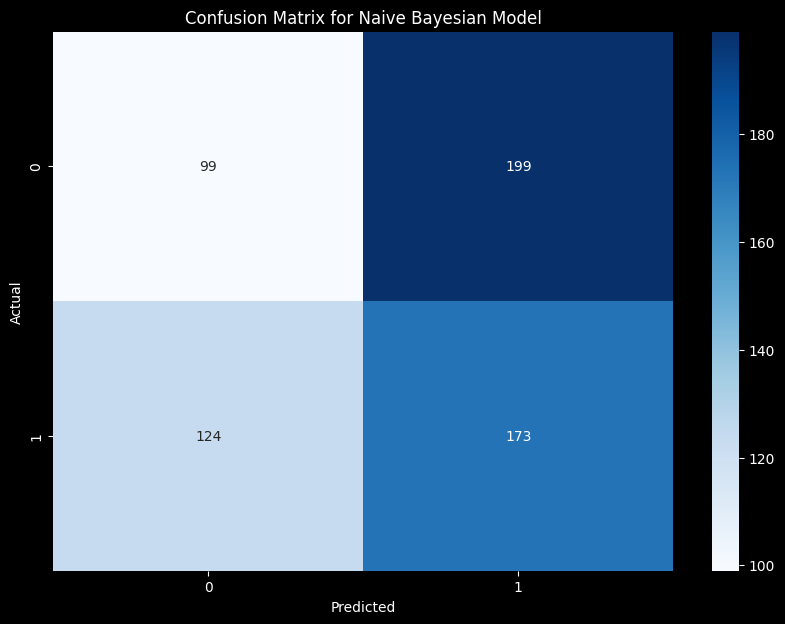

In [57]:
accuracy = accuracy_score(y_test_binary, y_prediction_binary)

# Calculate confusion matrix
conf_matrix_nb = confusion_matrix(y_test_binary, y_prediction_binary)

# Print accuracy
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayesian Model')
plt.show()

### SVM Model

In [76]:
ehl = pd.read_csv("ehl_data_label_encoded.csv")

ehl.head()

,Legal_Requirements,Privacy_Regulations,Data_Ownership,Security_Risks,Access_Control,Punishments_for_Violations,Proprietary_Tools,User_Access_Procedures,Patient_ID,Date_of_Birth,Gender,User_Is_Authenticated,Last_Visit,Age
0,3,3,0,1,0,1,1,2,344,1951-04-14,0,Not Authenticated,2024-07-08,73
1,2,1,3,1,0,1,3,1,540,1964-10-01,0,Not Authenticated,2023-05-14,59
2,0,2,2,1,2,2,2,1,398,1987-04-04,1,Authentication,2022-12-08,37
3,2,2,2,0,2,0,2,0,1976,1951-01-20,1,Authentication,2023-07-11,73
4,1,3,3,0,2,0,2,0,1204,1957-10-08,0,Authentication,2023-03-20,66


In [119]:
ehl["User_Is_Authenticated"].value_counts()

User_Is_Authenticated
Authentication       1520
Not Authenticated    1453
Name: count, dtype: int64

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
ehl.columns

Index(['Legal_Requirements', 'Privacy_Regulations', 'Data_Ownership',
       'Security_Risks', 'Access_Control', 'Punishments_for_Violations',
       'Proprietary_Tools', 'User_Access_Procedures', 'Patient_ID',
       'Date_of_Birth', 'Gender', 'User_Is_Authenticated', 'Last_Visit',
       'Age'],
      dtype='object')

In [122]:
ehl["User_Is_Authenticated"] = ehl["User_Is_Authenticated"].map({'Not Authenticated':0, 'Authentication':1})

In [123]:
X = ehl.drop(columns=["Date_of_Birth","Last_Visit", "User_Is_Authenticated", "Gender", "Patient_ID"])
y = ehl["User_Is_Authenticated"] 

In [59]:
#feature selection
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k = 5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

svm = SVC(kernel='linear', C=1)
svm.fit(X_train_selected, y_train)

pre_new = svm.predict(X_test_selected)
acc1 = accuracy_score(y_test, pre_new)

acc1

0.4689075630252101

In [79]:
X_test_selected

array([[   1,    3,    0, 1530,   89],
       [   3,    0,    1, 2674,   63],
       [   3,    2,    2,   19,   41],
       ...,
       [   3,    2,    0, 1386,   37],
       [   3,    1,    0, 2171,   45],
       [   3,    0,    1,  338,   89]])

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pre_new)
cm

array([[176, 121],
       [195, 103]])

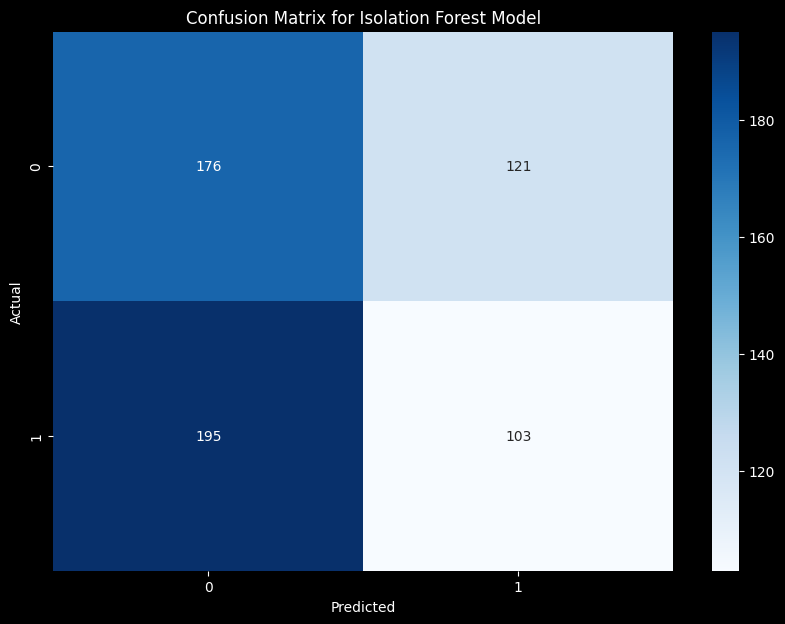

In [61]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Isolation Forest Model')
plt.show()